## 5-3,激活函数activation
激活函数在深度学习中扮演着非常重要的角色，它给网络赋予了非线性，从而使得神经网络能够拟合任意复杂的函数。

如果没有激活函数，无论多复杂的网络，都等价于单一的线性变换，无法对非线性函数进行拟合。

目前，深度学习中最流行的激活函数为 relu, 但也有些新推出的激活函数，例如 swish、GELU 据称效果优于relu激活函数。

激活函数的综述介绍可以参考下面两篇文章。

《一文概览深度学习中的激活函数》

https://zhuanlan.zhihu.com/p/98472075

《从ReLU到GELU,一文概览神经网络中的激活函数》

https://zhuanlan.zhihu.com/p/98863801

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers

### 一，常用激活函数
* tf.nn.sigmoid：将实数压缩到0到1之间，一般只在二分类的最后输出层使用。主要缺陷为存在梯度消失问题，计算复杂度高，输出不以0为中心。
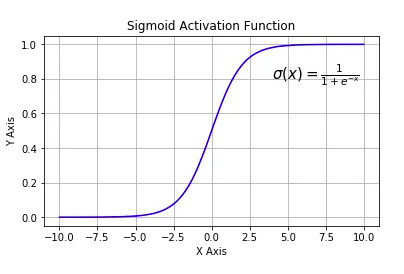

In [5]:
a = tf.constant(5.0, dtype=tf.float32)
result = tf.nn.sigmoid(a)
print(result)

tf.Tensor(0.9933072, shape=(), dtype=float32)


* tf.nn.softmax：sigmoid的多分类扩展，一般只在多分类问题的最后输出层使用。
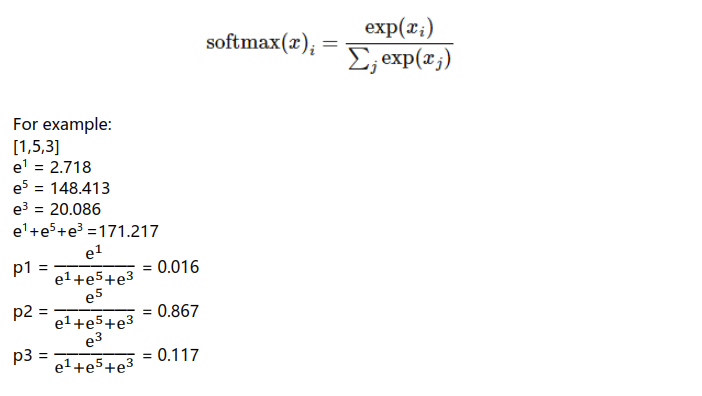

In [9]:
a = tf.constant([1,2,3,4], dtype=tf.float32)
result = tf.nn.softmax(a)
print(result)
tf.argmax(result)

tf.Tensor([0.0320586  0.08714432 0.23688284 0.6439143 ], shape=(4,), dtype=float32)


<tf.Tensor: shape=(), dtype=int64, numpy=3>

* tf.nn.tanh：将实数压缩到-1到1之间，输出期望为0。主要缺陷为存在梯度消失问题，计算复杂度高。
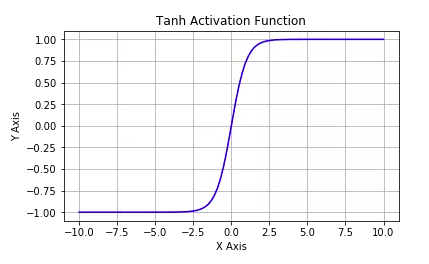

In [10]:
a = tf.constant(5.0)
aa = tf.nn.tanh(a)
print(aa)

tf.Tensor(0.99990916, shape=(), dtype=float32)


* tf.nn.relu：修正线性单元，最流行的激活函数。一般隐藏层使用。主要缺陷是：输出不以0为中心，输入小于0时存在梯度消失问题(死亡relu)。
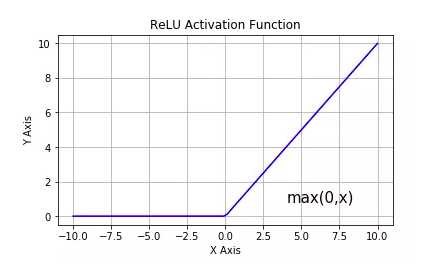

In [11]:
aa = tf.nn.relu(a)
print(aa)

tf.Tensor(5.0, shape=(), dtype=float32)


* tf.nn.leaky_relu：对修正线性单元的改进，解决了死亡relu问题, alpha = 0.2
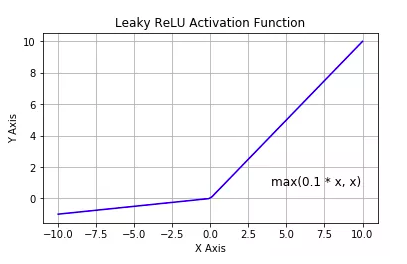

In [13]:
aa = tf.nn.leaky_relu(a)
print(aa)
aa = tf.nn.leaky_relu(tf.constant(-2.0))
print(aa)
tf.nn.leaky_relu()

tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(-0.4, shape=(), dtype=float32)


* tf.nn.elu：指数线性单元。对relu的改进，能够缓解死亡relu问题。
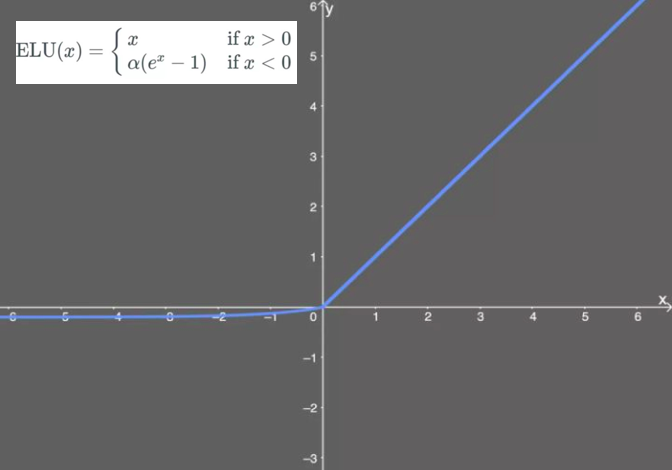

In [15]:
aa = tf.nn.elu(a)
print(aa)
aa = tf.nn.elu(tf.constant(-2.0))
print(aa)

tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(-0.86466473, shape=(), dtype=float32)


* tf.nn.selu：扩展型指数线性单元。在权重用tf.keras.initializers.lecun_normal初始化前提下能够对神经网络进行自归一化。不可能出现梯度爆炸或者梯度消失问题。需要和Dropout的变种AlphaDropout一起使用。
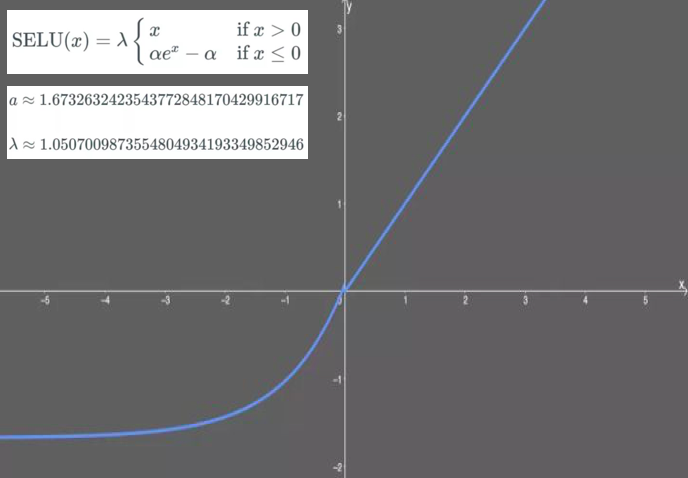

In [16]:
tf.nn.selu(a)

<tf.Tensor: shape=(), dtype=float32, numpy=5.253505>

* tf.nn.swish：自门控激活函数。谷歌出品，相关研究指出用swish替代relu将获得轻微效果提升。
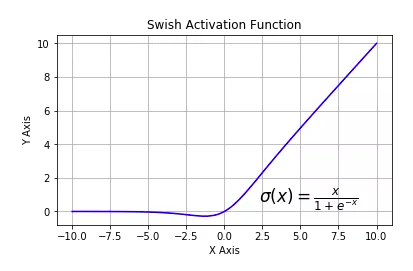

In [17]:
tf.nn.swish(a)

<tf.Tensor: shape=(), dtype=float32, numpy=4.966536>

* gelu：高斯误差线性单元激活函数。在Transformer中表现最好。tf.nn模块尚没有实现该函数。
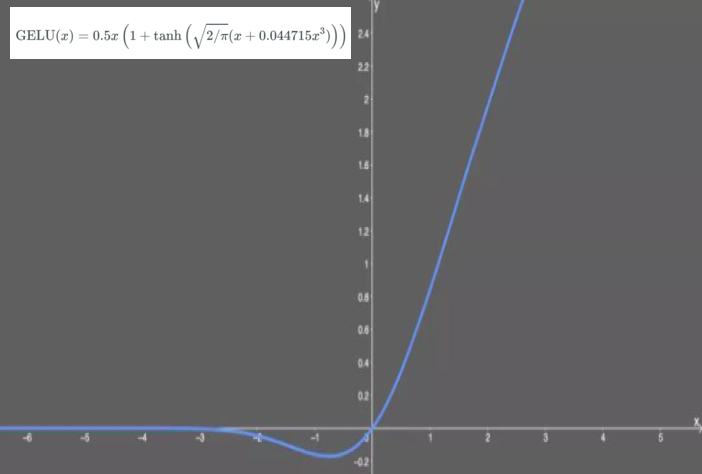

In [18]:
tf.nn.gelu(a)

AttributeError: module 'tensorflow_core._api.v2.nn' has no attribute 'gelu'

### 二 在模型中使用激活函数
在keras模型中使用激活函数一般有两种方式:
* 一种是作为某些层的activation参数指定
* 另一种是显式添加layers.Activation激活层

In [19]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(None, 16), activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Activation(tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 32)          544       
_________________________________________________________________
dense_1 (Dense)              (None, None, 64)          2112      
_________________________________________________________________
dense_2 (Dense)              (None, None, 10)          650       
_________________________________________________________________
activation (Activation)      (None, None, 10)          0         
Total params: 3,306
Trainable params: 3,306
Non-trainable params: 0
_________________________________________________________________
